###### Table of Contents

1. [Objective](#objective)
2. [Hypothesis](#hypothesis)
3. [Tools and Libraries](#tools_and_libraries)
    - [Pandas](#11_importing_libraries)
    - [Numpy](#11_importing_libraries)
    - [Matplotlib](#11_importing_libraries)
4. [Project Structure](#project_structure)
    1. [Sourcing and Loading](#1_sourcing_and_loading)
        - [Documentation for Libraries](#documentation_for_libraries)
        - [Importing Libraries](#1.1_importing_libraries)
        - [Loading the Data](#1.2_loading_the_data)
    2. [Cleaning, Transforming, and Visualizing](#2_cleaning_transforming_and_visualizing)
        - [Exploring the Data](#2.1_exploring_the_data)
        - [Check Missing Values](#2.2_check_missing_values)
        - [Convert Date Column to Datetime](#2.3_convert_date_column_to_datetime)
        - [Make a Copy of the Data](#2.4_make_a_copy_of_the_data)
        - [Calculate Daily Returns](#2.5_calculate_daily_returns)
        - [Filter Relevant Columns](#2.6_filter_relevant_columns)
        - [Resample Data](#2.7_resample_data)
        - [Convert Average Volume to Millions](#2.8_convert_average_volume_to_millions)
    3. [Exploratory Data Analysis (EDA)](#3_exploratory_data_analysis_eda)
        - [Visualize Time Series Data](#3.1_visualize_time_series_data)
        - [Explore Daily Returns](#3.2_explore_daily_returns)
    4. [Further Analysis](#4_further_analysis)
        - [Statistical Analysis](#4.1_statistical_analysis)
        - [Correlation Analysis](#4.2_correlation_analysis)
        - [Visualization of Correlations](#4.3_visualization_of_correlations)



# Title 

## Objectives 

***Hypothesis?***


Following Applications will be used: 
- **pandas**
    - **data ingestion and inspection** 
    - **exploratory data analysis** 
    - **tidying and cleaning** 
    - **transforming DataFrames** 
    - **subsetting DataFrames with lists** 
    - **filtering DataFrames** 
    - **grouping data** 
    - **melting data** 
    - **advanced indexing** 
- **matplotlib** 
- **fundamental data types** 
- **dictionaries** 
- **handling dates and times** 
- **function definition** 
- **default arguments, variable length, and scope** 
- **lambda functions and error handling** 

### 1. Sourcing and Loading 

The documentation for libraries can be found here:
* [Pandas](https://pandas.pydata.org/)
* [Numpy](http://www.numpy.org/) 
* [Matplotlib](https://matplotlib.org/) 


#### 1.1 Importing Libraries<a id='1.1_importing_libraries'></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter




#### 1.2.  Loading the data<a id='1.2_loading_the_data'></a>

The data comes from the [Kaggle](https://www.kaggle.com/datasets/abhimaneukj/tesla-inc-tsla-dataset?resource=download): a free, open-source data-sharing portal with a massive range of datasets.

In [3]:
#retrieve the file path from folder
file_path = 'TSLA.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

**Commentary:** Importing libraries sets the foundation for data manipulation and visualization. Loading the data is the initial step, allowing us to work with the raw dataset in subsequent sections.

### 2. Cleaning, transforming, and visualizing<a id='2._Cleaning_transforming_and_visualizing'></a>

#### 2.1. Exploring the data<a id='2.1_exploring_the_data'></a>

In [4]:
# Display the first few rows of the DataFrame
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [5]:
# Check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2843 non-null   object 
 1   Open       2843 non-null   float64
 2   High       2843 non-null   float64
 3   Low        2843 non-null   float64
 4   Close      2843 non-null   float64
 5   Adj Close  2843 non-null   float64
 6   Volume     2843 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.6+ KB


In [6]:
# Display basic summary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2.843000e+03
mean,105.868475,108.031370,103.555733,105.924597,105.924597,3.141524e+07
std,188.738974,192.483055,184.638617,188.836358,188.836358,2.841880e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,10.698000,11.026000,10.420000,10.727000,10.727000,1.251050e+07
50%,45.874001,46.493999,45.102001,45.916000,45.916000,2.481500e+07
75%,65.021000,66.251999,64.015001,65.275002,65.275002,4.012025e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [7]:
# Check out the data types:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

#### 2.2 Check Missing Values<a id='2.2_check_missing_values'></a>


In [8]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### 2.3 Convert Date Column to Datetime<a id='2.3_convert_date_column_to_datetime'></a>


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

# Create Time-Based Indices:
df.set_index('Date', inplace=True)



In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


# Look for any missing dates

In [27]:
# Generate a complete date range
complete_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Find missing dates
missing_dates = complete_date_range.difference(df.index)

# Get the count of missing dates
count_missing_dates = len(missing_dates)

# Display the count of missing dates
print("Total Count of Missing Dates:", count_missing_dates)

Total Count of Missing Dates: 1281


In [62]:
# Get the unique years in the DataFrame
unique_years = df.index.year.unique()

# Loop through each year and calculate the count of missing dates
for selected_year in unique_years:
    # Filter data for the selected year
    df_selected_year = df[df.index.year == selected_year]
    
    # Generate a complete date range for the current year
    complete_date_range_year = pd.date_range(start=f'{selected_year}-01-01', end=f'{selected_year}-12-31', freq='D')
    
    # Find missing dates for the current year
    missing_dates_year = complete_date_range_year.difference(df_selected_year.index)
    
    # Get the count of missing dates for the current year
    count_missing_dates_year = len(missing_dates_year)
    
    # Display the count of missing dates for the current year
    print(f"Count of Missing Dates in {selected_year}: {count_missing_dates_year}")


Count of Missing Dates in 2010: 237
Count of Missing Dates in 2011: 113
Count of Missing Dates in 2012: 116
Count of Missing Dates in 2013: 113
Count of Missing Dates in 2014: 113
Count of Missing Dates in 2015: 113
Count of Missing Dates in 2016: 114
Count of Missing Dates in 2017: 114
Count of Missing Dates in 2018: 114
Count of Missing Dates in 2019: 113
Count of Missing Dates in 2020: 113
Count of Missing Dates in 2021: 167


The dataset spanning from 2010 to 2021 exhibits instances of missing dates, with varying counts from year to year. An interesting observation is the relatively consistent count of missing dates from 2011 to 2020, suggesting potential systemic factors or data collection practices during that period. However, the year 2010 stands out with 237 missing dates, warranting a closer examination to identify potential anomalies or issues during the initial data collection phase. Conversely, 2021 displays a noteworthy count of 167 missing dates, prompting an investigation into when data collection ceased. It is important to highlight that 2020 serves as a benchmark due to its consistency with the other years, making it a crucial reference point for understanding data completeness and potential disruptions in the dataset. 

### Examine when data was frist collected


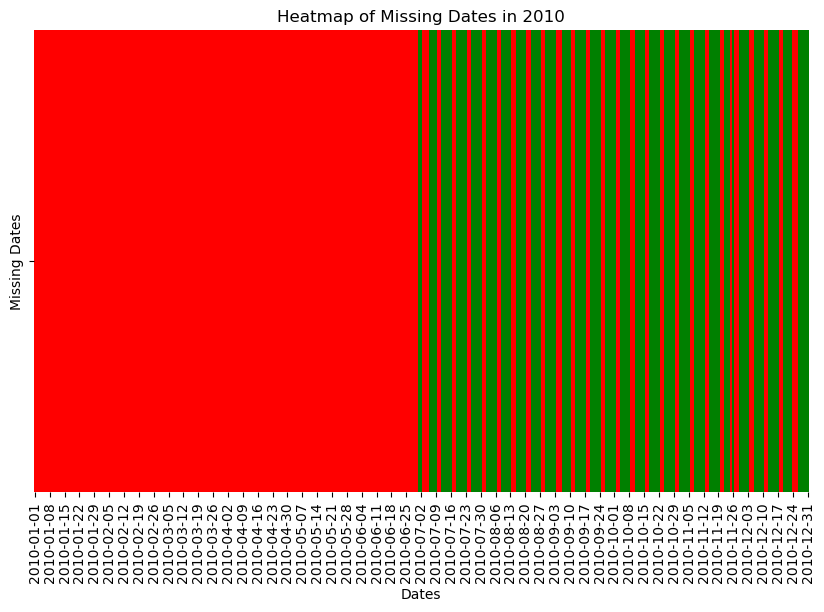

In [67]:

# Filter data for the year 2010
df_10 = df[df.index.year == 2010]

# Generate a complete date range for the entire year 2010
complete_date_range_2010 = pd.date_range(start=f'2010-01-01', end=f'2010-12-31', freq='D')

# Find missing dates in 2010
missing_dates_2010 = complete_date_range_2010.difference(df_10.index)

# Create a DataFrame with 1 for existing dates and 0 for missing dates
heatmap_data = pd.DataFrame(index=complete_date_range_2010)
heatmap_data['Missing Dates'] = heatmap_data.index.isin(missing_dates_2010).astype(int)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, cmap=['green', 'red'], cbar=False)
plt.title('Heatmap of Missing Dates in 2010')
plt.xlabel('Dates')


# Change the date format of the x-axis tick labels
date_form = DateFormatter('2010-%m-%d')
plt.gca().xaxis.set_major_formatter(date_form)

plt.show()

Just as expected the data was not collect untill around July of 2010 now lets find out the exact that data was frist collected: 

In [64]:
# Filter data for the year 2010
df_10 = df[df.index.year == 2010]

# Sort data to find the lastest date for 2010
df_10.sort_index(ascending=True, inplace=True)

df_10.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


Data was not collected until 2010-07-01

### Examinating last two years 

* Count of Missing Dates in 2020: ****112****
* Count of Missing Dates in 2021: ****86****

Lets frist look at 2020 to see if it makes any sense with was we know about the data set 

This makes sense because the U.S. stock market is not open on weekends, holidays, and other dates but it seems consistant. 

Now lets look at 2021 

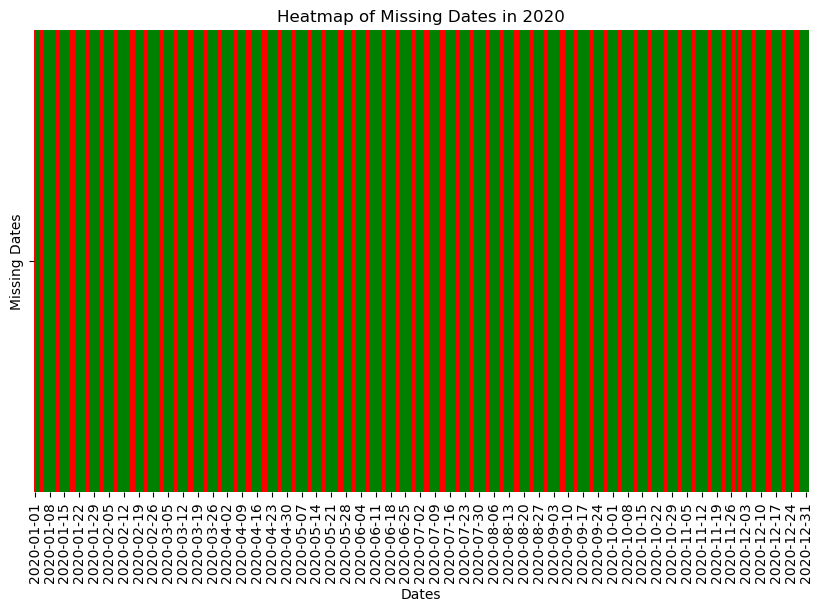

In [69]:
df_20 = df[df.index.year == 2020]

# Generate a complete date range for 2020
complete_date_range_2020 = pd.date_range(start=f'2020-01-01', end=f'2020-12-31', freq='D')

# Find missing dates in 2020
missing_dates_2020 = complete_date_range_2020.difference(df_20.index)

# Create a DataFrame with 1 for existing dates and 0 for missing dates
heatmap_data = pd.DataFrame(index=complete_date_range_2020)
heatmap_data['Missing Dates'] = heatmap_data.index.isin(missing_dates_2020).astype(int)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, cmap=['green', 'red'], cbar=False)
plt.title('Heatmap of Missing Dates in 2020')
plt.xlabel('Dates')



# Change the date format of the x-axis tick labels
date_form = DateFormatter('2020-%m-%d')
plt.gca().xaxis.set_major_formatter(date_form)
plt.show()

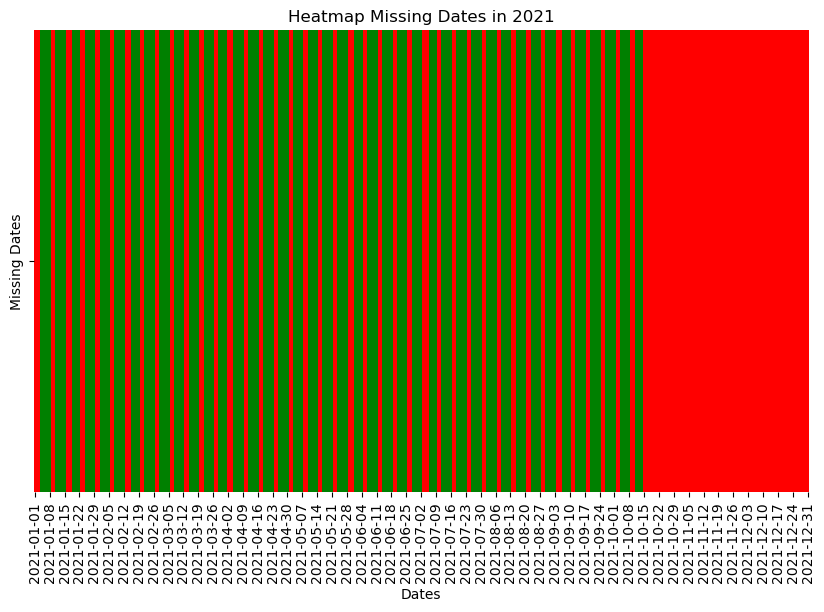

In [72]:
df_21 = df[df.index.year == 2021]

# Generate a complete date range for 2021
complete_date_range_2021 = pd.date_range(start=f'2021-01-01', end=f'2021-12-31', freq='D')

# Find missing dates in 2021
missing_dates_2021 = complete_date_range_2021.difference(df_21.index)

# Create a DataFrame with 1 for existing dates and 0 for missing dates
heatmap_data = pd.DataFrame(index=complete_date_range_2021)
heatmap_data['Missing Dates'] = heatmap_data.index.isin(missing_dates_2021).astype(int)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, cmap=['green', 'red'], cbar=False)
plt.title('Heatmap Missing Dates in 2021')
plt.xlabel('Dates')



# Change the date format of the x-axis tick labels
date_form = DateFormatter('2021-%m-%d')
plt.gca().xaxis.set_major_formatter(date_form)
plt.show()

Just as expect the data creased being collected around October of 2021. Lets find the exact date in which data collecting creased.  

# Remove 2010 and maybe 2021

In [56]:
# Filter data for the year 2010
df_21 = df[df.index.year == 2021]

# Sort data to find the lastest date for 2021
df_21.sort_index(ascending=False, inplace=True)

df_21.head()

C:\Users\marti\AppData\Local\Temp\ipykernel_19196\4070552156.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21.sort_index(ascending=False, inplace=True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-14,815.489990,820.250000,813.349976,818.320007,818.320007,12203200
2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100
2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100


Data collection crease on 2021-10-14 

#### 2.4 Make a copy of the data<a id='2.4_make_a_copy_of_the_data'></a>

In [9]:
# Create a copy of the DataFrame
df_copy = df.copy()

#### 2.5 Filter Relevant Columns<a id='2.5_filter_relevant_columns'></a>
Select the columns that are relevant for your analysis.

In [10]:
selected_columns = ['Volume']
df1 = df_copy[selected_columns]
df1.describe()

,Volume
count,2.843000e+03
mean,3.141524e+07
std,2.841880e+07
min,5.925000e+05
25%,1.251050e+07
50%,2.481500e+07
75%,4.012025e+07
max,3.046940e+08


#### 2.6 Resample Data<a id='2.6_resample_data'></a>


  - Resampling is valuable when dealing with irregular time series data or when aligning data with a specific time frame for analysis. 
  
  - It aids in obtaining a more manageable and consistent dataset for further exploration.

- For time series, consider resampling the data to a different frequency (e.g., weekly or monthly).


In [11]:
df_resampled = df.resample('M').mean()  # Example: resampling to monthly frequency
# Rename the columns
df_resampled = df_resampled.rename(columns={'Open': 'Average Open', 'High': 'Average High', 'Low': 'Average Low', 'Close': 'Average Close', 'Adj Close': 'Average Adj Close', 'Volume': 'Average Volume'})

# Rename the index
df_resampled = df_resampled.rename_axis('Month')

df_resampled.head()

,Average Open,Average High,Average Low,Average Close,Average Adj Close,Average Volume
Month,,,,,,
2010-07-31,4.014667,4.128000,3.763238,3.911619,3.911619,1.537519e+07
2010-08-31,3.909091,3.982000,3.816091,3.902182,3.902182,3.417773e+06
2010-09-30,4.155810,4.255238,4.061810,4.148095,4.148095,4.296643e+06
2010-10-31,4.144667,4.198571,4.085143,4.142667,4.142667,1.559000e+06
2010-11-30,5.717429,5.974000,5.545714,5.808381,5.808381,6.741690e+06


In [12]:
# Assuming 'df_resampled' is your DataFrame with 'Average Volume'
df_resampled['Average Volume (Millions)'] = df_resampled['Average Volume'] / 1_000_000

# Drop the original 'Average Volume' column if needed
df_resampled = df_resampled.drop(columns=['Average Volume'])

#
df_resampled.head()





,Average Open,Average High,Average Low,Average Close,Average Adj Close,Average Volume (Millions)
Month,,,,,,
2010-07-31,4.014667,4.128000,3.763238,3.911619,3.911619,15.375190
2010-08-31,3.909091,3.982000,3.816091,3.902182,3.902182,3.417773
2010-09-30,4.155810,4.255238,4.061810,4.148095,4.148095,4.296643
2010-10-31,4.144667,4.198571,4.085143,4.142667,4.142667,1.559000
2010-11-30,5.717429,5.974000,5.545714,5.808381,5.808381,6.741690


#### 2.7 Calculate Daily Returns<a id='2.7_calculate_daily_returns'></a>

When I'm working with financial stock data, calculating daily returns is a key aspect of my analysis. Daily returns provide insights into the percentage change in a stock's value from one day to the next. Here's how I approach calculating daily returns:

##### Daily Returns:

- **Open-Close Daily Return:**
  This represents the percentage change from the opening price to the closing price of a stock on a given day. It's a measure of the daily price movement.

- **High-Low Daily Return:**
  This represents the percentage change within a single trading day, from the lowest to the highest price. It offers insights into the intraday volatility.

- **Adjusted Close Daily Return:**
  Similar to the Open-Close Daily Return, but using the adjusted close prices. Adjusted close prices account for events such as dividends and stock splits, providing a more accurate representation of the stock's daily return.

- **Volume Daily Return:**
  Represents the percentage change in trading volume from one day to the next. Sudden increases in volume might indicate increased interest or potential price movements.

It's crucial for me to calculate daily returns as they help me gauge the relative performance of a stock on a day-to-day basis. This information is valuable for various trading and investment strategies, allowing me to make informed decisions based on historical price and volume movements.




In [13]:
df_copy['daily_return'] = df_copy['Adj Close'].pct_change()
df_copy.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,NaN
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,-0.125683
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,-0.160937
2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500,-0.019243
2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000,0.105063


#### 2.7 Delta<a id='2.8_Delta'></a>

When I'm dealing with financial stock data, I consider different types of deltas (changes) based on my analysis and goals. Here are some commonly used deltas in financial analysis:

##### Daily Price Movements:

- **Open-Close Delta:**
  This represents the change from the opening price to the closing price of a stock on a given day. It provides insights into the intraday price movement.

- **High-Low Delta:**
  This represents the range of price movement within a single trading day, from the lowest to the highest price. It gives information about the volatility during the day.

##### Adjusted Close Delta:

- **Adjusted Close Delta:**
  Similar to the Open-Close Delta, but using the adjusted close prices. Adjusted close prices account for events such as dividends and stock splits, providing a more accurate representation of the stock's value.

##### Volume Delta:

- **Volume Delta:**
  Represents the change in trading volume from one day to the next. Sudden increases in volume might indicate increased interest or potential price movements.

It's essential for me to choose the delta that aligns with my analysis goals. For example, if I'm interested in short-term price movements, I might focus on Open-Close and High-Low deltas. If I'm concerned about corporate actions affecting the stock, Adjusted Close Delta could be more appropriate.


In [14]:
# Calculate deltas for price-related columns
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
for column in price_columns:
    df_copy[column + '_Delta'] = df_copy[column] - df_copy[column].shift(1)

# Calculate delta for 'Volume'
df_copy['Volume_Delta'] = df_copy['Volume'] - df_copy['Volume'].shift(1)



column_order = ['Open', 'Open_Delta', 'High', 'High_Delta', 'Low', 'Low_Delta',
                'Close', 'Close_Delta', 'Adj Close', 'Adj Close_Delta', 'Volume', 'Volume_Delta']

df_copy = df_copy[column_order]

df_copy.dropna()


df_copy.head()



,Open,Open_Delta,High,High_Delta,Low,Low_Delta,Close,Close_Delta,Adj Close,Adj Close_Delta,Volume,Volume_Delta
Date,,,,,,,,,,,,
2010-07-01,5.000,NaN,5.184,NaN,4.054,NaN,4.392,NaN,4.392,NaN,41094000,NaN
2010-07-02,4.600,-0.400,4.620,-0.564,3.742,-0.312,3.840,-0.552,3.840,-0.552,25699000,-15395000.0
2010-07-06,4.000,-0.600,4.000,-0.620,3.166,-0.576,3.222,-0.618,3.222,-0.618,34334500,8635500.0
2010-07-07,3.280,-0.720,3.326,-0.674,2.996,-0.170,3.160,-0.062,3.160,-0.062,34608500,274000.0
2010-07-08,3.228,-0.052,3.504,0.178,3.114,0.118,3.492,0.332,3.492,0.332,38557000,3948500.0


# Note:

## Find Delta for n -> n-1 to n -> n-2 .... n -> n-m

**Commentary:** Cleaning and transforming the data are crucial steps for ensuring its quality and suitability for analysis. Visualization aids in uncovering patterns and trends, guiding us toward more focused exploration.

In [15]:
# Group by year and calculate summary statistics
summary_statistics_by_year = df.groupby(df.index.year).agg({
    'Open': ['mean', 'std', 'min', 'max'],
    'Close': ['mean', 'std', 'min', 'max'],
    'Volume': ['mean', 'std', 'min', 'max']
})

# Rename the columns for clarity
summary_statistics_by_year.columns = [f'{col[0]}_{col[1]}' for col in summary_statistics_by_year.columns]

# Display the summary statistics by year
print("Summary Statistics by Year:")
print(summary_statistics_by_year)

Summary Statistics by Year:
       Open_mean    Open_std    Open_min    Open_max  Close_mean   Close_std  \
Date                                                                           
2010    4.684766    1.019008    3.228000    7.174000    4.666750    1.024196   
2011    5.364397    0.556383    4.356000    6.926000    5.360952    0.570726   
2012    6.240624    0.523362    5.324000    7.638000    6.233720    0.545828   
2013   20.883286   10.615145    6.616000   38.792000   20.880246   10.605334   
2014   44.683079    5.957028   28.100000   57.534000   44.665817    5.859630   
2015   45.966389    4.750339   37.166000   56.040001   46.008580    4.754049   
2016   42.011690    4.280572   28.464001   53.290001   41.953452    4.273895   
2017   62.859243    8.342982   42.950001   77.337997   62.863259    8.193263   
2018   63.436693    5.751053   50.556000   75.000000   63.461984    5.752044   
2019   54.605627   10.469095   36.220001   87.000000   54.706040   10.606053   
2020  289.10

#### 3.1 Save data<a id='2.12_Save_data'></a>

In [39]:
df_copy['daily_return Adj Close'] = df_copy['Adj Close'].pct_change()
df = df_copy

In [47]:
df.shape

(2843, 13)

In [50]:
df.head()

,Open,Open_Delta,High,High_Delta,Low,Low_Delta,Close,Close_Delta,Adj Close,Adj Close_Delta,Volume,Volume_Delta,daily_return Adj Close
Date,,,,,,,,,,,,,
2010-07-01,5.000,NaN,5.184,NaN,4.054,NaN,4.392,NaN,4.392,NaN,41094000,NaN,NaN
2010-07-02,4.600,-0.400,4.620,-0.564,3.742,-0.312,3.840,-0.552,3.840,-0.552,25699000,-15395000.0,-0.125683
2010-07-06,4.000,-0.600,4.000,-0.620,3.166,-0.576,3.222,-0.618,3.222,-0.618,34334500,8635500.0,-0.160937
2010-07-07,3.280,-0.720,3.326,-0.674,2.996,-0.170,3.160,-0.062,3.160,-0.062,34608500,274000.0,-0.019243
2010-07-08,3.228,-0.052,3.504,0.178,3.114,0.118,3.492,0.332,3.492,0.332,38557000,3948500.0,0.105063


In [52]:
import os

# Create the 'data' directory if it doesn't exist
os.makedirs('../data', exist_ok=True)

# Save the DataFrame to a CSV file
df.to_csv('../data/TSLA_cleaned.csv', index=True)
